In [1]:
%pip install pandas seaborn
%pip install scikit-learn
%pip install prince
%pip install mca
%pip install lightgbm
%pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6010 sha256=192df2cb1ae2985740c1fbfd0ac702f561c85534833b408636c916a4e99b13e5
  Stored in directory: /root/.cache/pip/wheels/41/3c/28/32383be9777008d3318b6e787b89273ca4a6c6c915ce9bd1f3
Successfully built mca


In [2]:
import sklearn
import seaborn as sns
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import prince
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import GridSearchCV

In [3]:
datei = pd.read_csv("train.csv")

In [4]:
datei.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Survived* zeigt an ob jemand überlebt hat, 1 bedeutet die Person hat überlebt und 0 dass sie gestorben ist. *Pclass* ist die Ticket Klasse.*Sex* ist das Geschlecht, *Age* das Alter, *SibSp* zeigt an ob der Passagier Geschwister oder Ehepartner hat und *Parch* ob es ein Elternteil hat oder ein Kind. *Ticket* ist die Ticket Number und *Fare* der Preis für das Ticket. *Cabin* welche Kabine der Passagier hat und *Embarked* aus welchen Hafen eingestiegen sind, S ist hierbei Southampton, C Cherbourg und Q Queenstown.

In [5]:
datei.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Insgesamt befanden sich 891 Passagiere and Board der Titanic, das Durchschnnittsalter ist 29 und der Durchschnittsticketpreis ist 32 Dollar.Insgesamt haben knapp 40% überlebt.

In [6]:
datei.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin hat sehr viele fehlende Werte, dazu noch Age und Embarked.

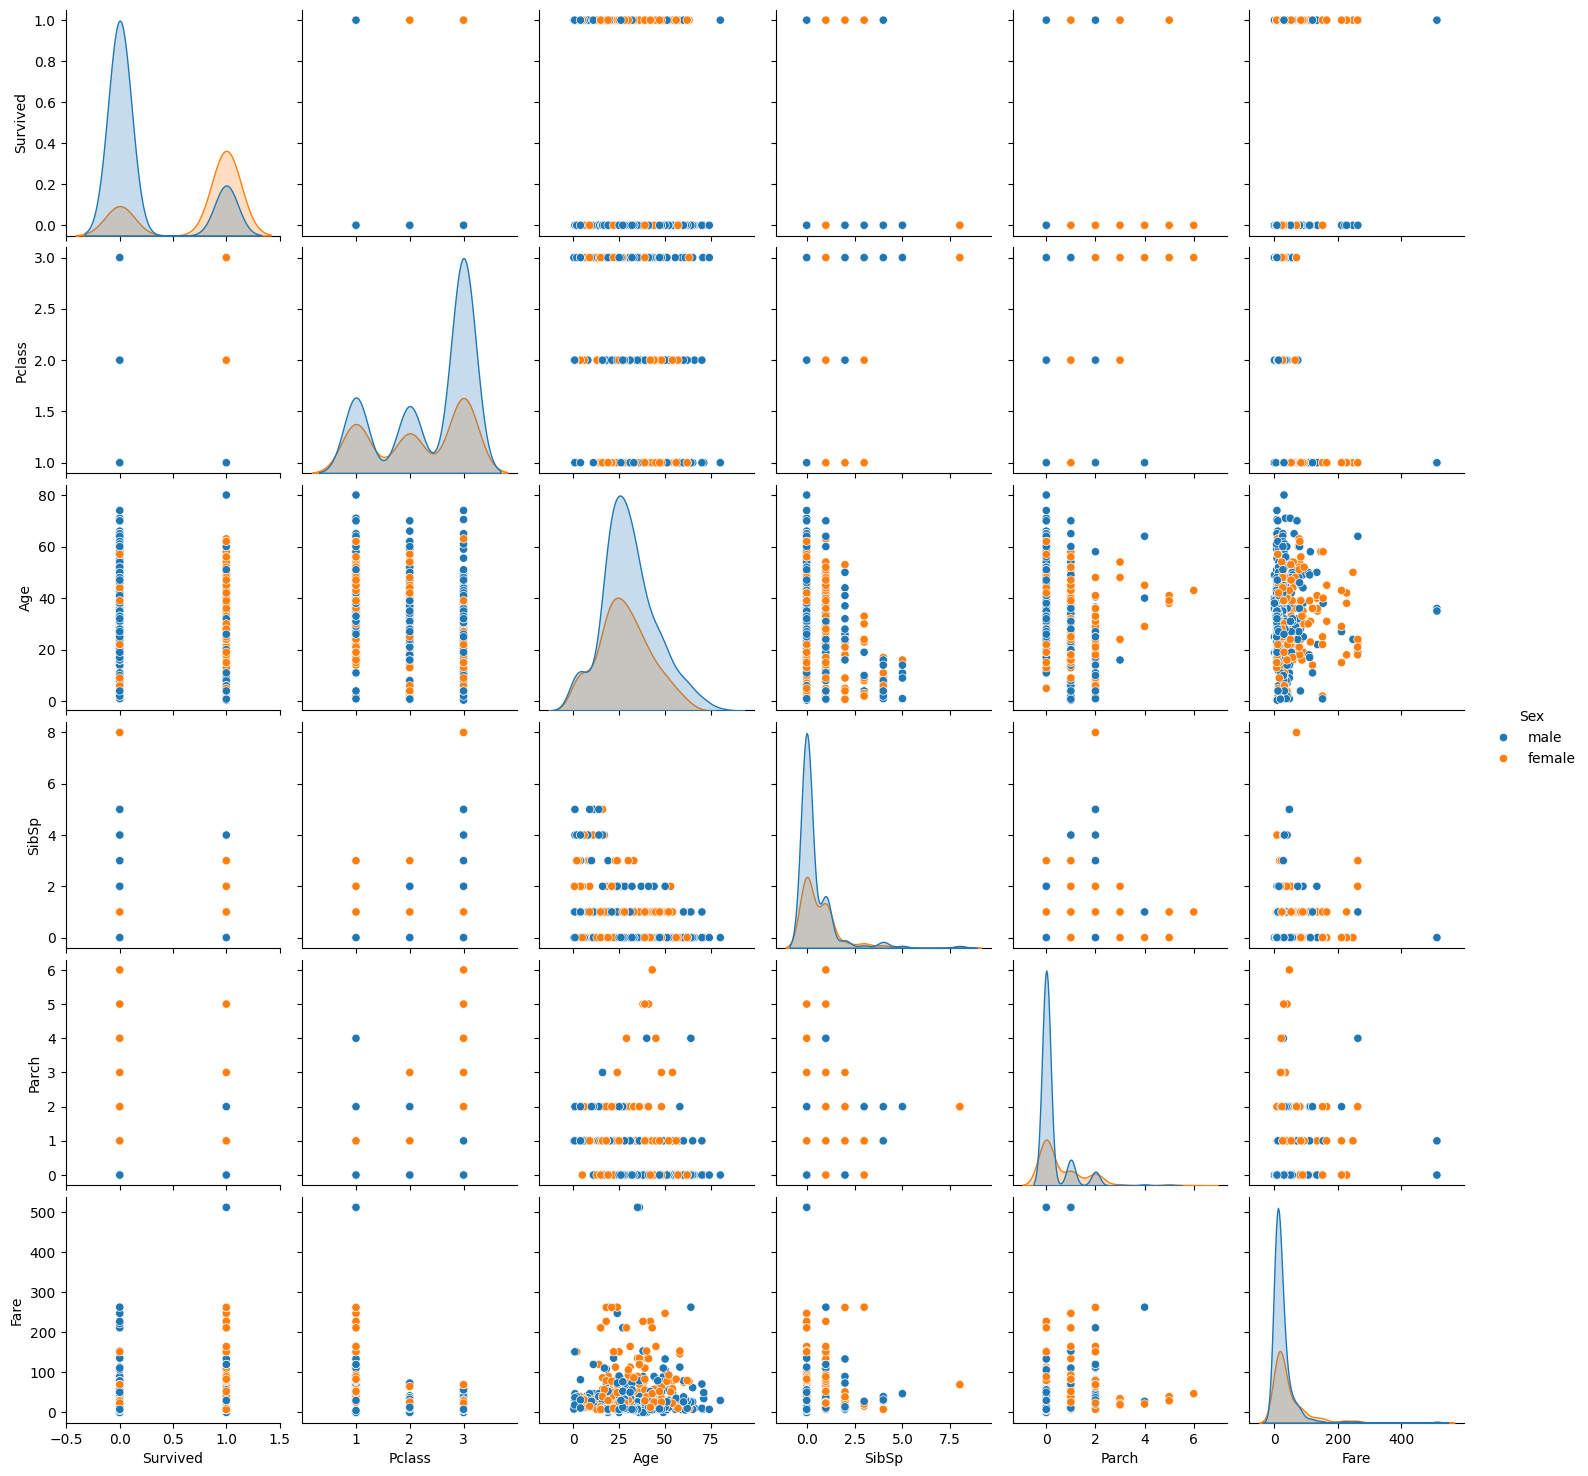

In [7]:
sns.pairplot(datei.loc[:,datei.columns !="PassengerId"], hue="Sex")

Ein Scatterplot wird berechnet um einen Überblick über die Variablen und ihre Vertielung zu erhalten, vor allem in Bezug auf die Überlebensrate.
Aus der Grahpik oben links können wir sehen, dass im Durchschnitt mehr Frauen  als Männer überlebt haben. Für die anderen Variablen lässt sich nicht sofort ein gleicher Zusammenhang mit der Überlebensrate herleiten. Wir können sehen, dass sehr viele Männer in der Passagierklasse 3 waren, also der untersten Klasse.

Text(0.5, 1.0, 'Überlebensrate anhand des Starthafen')

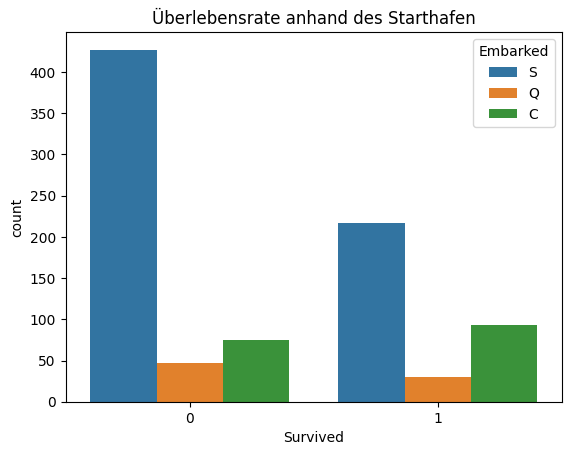

In [8]:
sns.countplot(datei, x = "Survived", hue = "Embarked").set_title("Überlebensrate anhand des Starthafen")

Um die *Embarked* Variable besser darzustellen, wird ein Histogram verwendet, mit der Überlebensrate auf der X-Achse. Allgemein sind die meisten in Southhampton eingestiegen.Passagiere die in Chesterton eingestiegen sind, hatten eine höhere Überlebensrate .

Text(0.5, 1.0, 'Überlebensrate anhand der Passagierklasse')

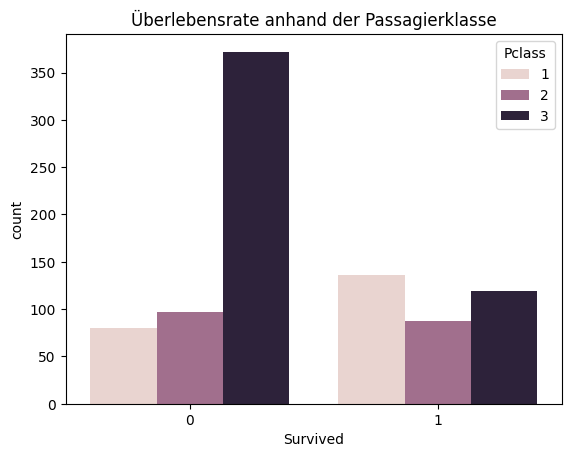

In [9]:
sns.countplot(datei, x = "Survived", hue = "Pclass").set_title("Überlebensrate anhand der Passagierklasse")

Die meisten Passagiere sind aus der Passagierklasse 3, der niedrigsten Klasse und die Sterberate für Passagiere aus der zweiten und dritten Klasse sind höher für die erste Klasse.

Text(0.5, 1.0, 'Überlebensrate mit Geschwister oder Lebenspartner')

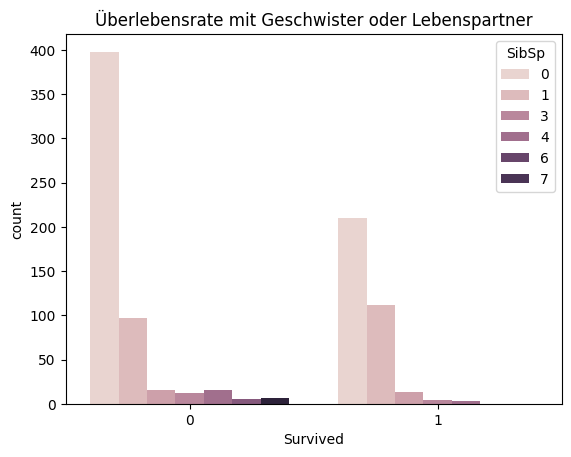

In [10]:
sns.countplot(datei, x = "Survived", hue = "SibSp").set_title("Überlebensrate mit Geschwister oder Lebenspartner")

Die meisten Passagiere hatten entweder einen oder null Geschwister oder Lebenspartner. Passagiere mit einem Geschwister oder Partner haben allgemein eine höhere Überlebenswahrscheinlichkeit.

Text(0.5, 1.0, 'Überlebensrate mit Eltern oder Kind')

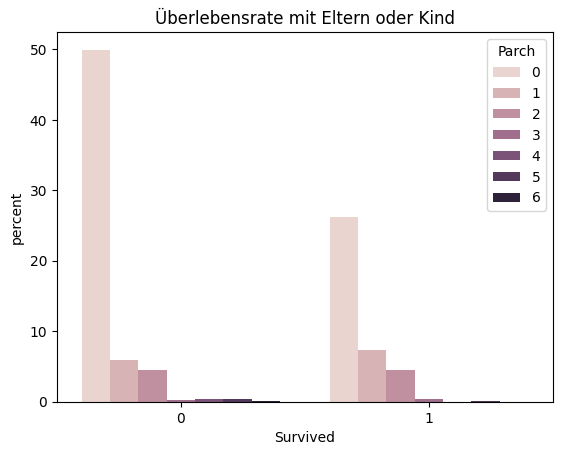

In [11]:
sns.countplot(datei, x = "Survived", hue = "Parch", stat = "percent").set_title("Überlebensrate mit Eltern oder Kind")

Weil viele nominale und ordinale Variablen vorhanden sind, wird für die explorative Datenanalyse eine Multiple Korrespondenzanalyse durchgeführt. Die Korrespondenzanalyse ist hierbei ähnlich zur Hauptkomponentenanalyse. Dabei wird versucht, aus den Daten neue Variablen $z_i$ zu berechnen, die untereinander unkorreliert sind. Dabei sind diese neuen Variablen eine Linearkombination der Variablen $x_1$ bis $x_p$ mit jeweiligen Gewichten. Diese Gewichten geben an, wieviel der Varianz dieser neue Variable $z_i$ erklärt wird. Aus diesen Gewichten können wir dann herleiten, wie die Variablen untereinander korreliert sind.

In [12]:
mca_data = prince.MCA(n_components = 10, copy = True)
mca_fit = mca_data.fit(datei[["Survived", "Pclass", "Sex", "SibSp","Embarked", "Parch"]])

In [13]:
mca_fit.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.339,11.30%,11.30%
1,0.262,8.74%,20.04%
2,0.209,6.98%,27.02%
3,0.207,6.90%,33.92%
4,0.192,6.39%,40.31%
5,0.182,6.06%,46.37%
6,0.175,5.84%,52.22%
7,0.167,5.58%,57.80%
8,0.167,5.56%,63.35%


Für die Analyse verwenden wir die Variablen *Survived*, *Pclass*, *Sex*, *SibSp*, *Embarked*, *Parch*. Anhand der Eigenwere können wir berechnen, wie viel der gesamten Varianz von den neuen Variablen $z_i$ erklärt wird. Die ersten beiden Komponenten können insgesamt 20% der gesamten Varianz erklären.

In [14]:
mca_fit.column_contributions_.head(7).style.format("{:.0%}")

,0,1,2,3,4,5,6,7,8,9
Survived_0,11%,1%,0%,1%,2%,0%,1%,0%,0%,0%
Survived_1,18%,1%,0%,1%,4%,0%,1%,1%,0%,0%
Pclass_1,8%,5%,14%,0%,5%,0%,0%,1%,0%,0%
Pclass_2,1%,0%,4%,25%,9%,2%,2%,7%,0%,1%
Pclass_3,6%,3%,2%,7%,0%,1%,0%,1%,0%,0%
Sex_female,16%,1%,1%,3%,6%,1%,2%,0%,0%,0%
Sex_male,9%,0%,0%,2%,3%,0%,1%,0%,0%,0%


Für die erste Komponente können wir erkennen, dass insgesamt knapp 30% der Varianz durch die Überlebensrate erklärt wird. Zusätzlich kommen noch 25% und 15% die durch das Geschlecht und die Passagierklasse erklärt werden.

In [15]:
mca_fit.plot(datei[["Survived", "Pclass", "Sex", "SibSp","Embarked", "Parch"]], show_row_markers = False, show_column_markers = False, show_column_labels = True)

alt.LayerChart(...)

Die X-Achse ist die erste Komponente, die für die Überlebensrate interessant ist. Je näher die Variablen zueinander sind, desto eher treten sie gemeinsam auf, bzw. sind eher korreliert. In diesem Plot sind die Variablen *Survived_1*, *Sex_female*, *SibSp_1* und *Parch_1* nah um den Wert 0.9, d.h. allgemein dass Frauen eine höhere Überlebensrate hatten, sowie Passagiere mit einem Geschwister oder Lebenspartner oder mit einem Elternteil bzw. Kind. Dies stimmt mit den Resultaten überein, die wir vorher in den Plots gesehen hatten.

In [16]:
datei.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

Der Name enthält den Vor- und Nachnamen sowie die Anrede. Die Anrede könnte hierbei hilfreich sein, da sie mehr Informationen über die Person enthalten könnte, als nur das Geschlecht.

In [17]:
datei["Cabin_grouped"] = datei["Cabin"].str.extract("^([A-Z]){1}")
datei["Cabin_grouped"] = datei["Cabin_grouped"].fillna("M")

In [18]:
pd.crosstab(datei.Cabin_grouped, datei.Pclass)

Pclass,1,2,3
Cabin_grouped,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4
M,40,168,479
T,1,0,0


Um die Analyse der Kabine zu vereinfachen, wird der erste Buchstabe der Kabine genommen um die unterschiedlichen Kabinen zu gruppieren. Daraufhin erhalten wir Kabinen von A bis G sowie die Kabine T. Dabei muss berücksichtigt werden, dass viele Kabinen nicht vorhanden sind. Um diese trotzdem in der Analyse berücksichtigen zu können, werden sie als "M" markiert. Die Kabinen von A bis C haben nur Passagiere in der Klasse 1, während D und E die meisten Passagiere in Klasse 1 haben und ein paar in Klasse 2. F und G haben nur die unteren Passagierklassen. Bei den fehlenden Klassen ist der größte Teil in der Klasse 3.
Wir können also eher davon ausgehen, dass die fehlenden Werte nicht zufällig sind, sondern die fehlenden Werte abhängig sind von den unteren Klasse.


### Modellschätzung
Um diese Modelle zu trainieren, müssen wir zuvor Preprocessing betreiben, d.h. fehlende Werte entweder schätzen oder entfernen, nominale und ordinale Variablen in numerische via One-Hot Encoding zu verwandeln und zusätzliche Features erstellen, die bei der Modellierung hilfreich sein könnten. Aus der vorherigen Analyse konnten wir sehen, dass die Anrede möglicherweise hilfreich sein könnte, deswegen klassifizieren wir die Namen anhand der Anrede. Zusätzlich erstellen wir eine neue Variable Familie, die die Summe aus Parch, SibSp und 1 sind. D.h. wenn jemand keine weiteren Familienmitglieder dabei hat und somit Alleine ist, wird dieser Persond er Wert 1 zugeordnet. Zusätzlich standardisieren wir Fare und klassifizieren die Anreden in Miss, Mr, Mrs und Other

In [19]:
def feature_preparation(datei):
    datei["Sex"]=datei["Sex"].map({"male":0,"female":1})
    datei["Cabin_grouped"]=datei["Cabin_grouped"].map({"A":0,"B":1, "C":2, "D":3,"E":4, "F":5, "G": 6, "T":7, "M" :8 })
    datei["Family"] = datei["Parch"] + datei["SibSp"]+1
    datei['Embarked']=datei['Embarked'].map({'S':0,'C':1, 'Q':2})
    datei["Title"] = datei["Name"].str.extract("([A-Za-z]+)\.")
    datei.Title.replace(["Mlle","Mme","Ms","Dr","Major","Lady","Countess","Jonkheer","Col",
                          "Rev","Capt","Sir","Don","Dona"],["Miss","Miss","Miss","Mr","Mr","Mrs","Mrs","Mr","Other","Other","Mr","Mr","Mr", "Mrs"],inplace=True)
    datei = pd.concat([datei,pd.get_dummies(datei.Title)], axis = 1)
    return datei

In [20]:
datei = feature_preparation(datei)

In [21]:
estimator_impute = BayesianRidge()
estimate_impute = IterativeImputer(random_state=0, estimator=estimator_impute, max_iter=25, tol=1e-3)
estimate_impute = estimate_impute.fit(datei[["Pclass", "Sex", "Age","Embarked", "Fare", "Cabin_grouped"]])
datei[["Pclass", "Sex", "Age","Embarked", "Fare", "Cabin_grouped"]] = estimate_impute.transform(datei[["Pclass", "Sex", "Age","Embarked", "Fare", "Cabin_grouped"]])

Um die fehlenden Werte zu berechnen, wird ein Bayesian Ridge regression verwendet. Ridge regression ist ähnlich wie eine linearen Regression, dabei wird ein zusätzlicher Penalty term für die Parameter hinzugefügt. Der Penalty Term führt zu einem Shrinkage Effekt für die Parameter, d.h. die Parameter werden in Richtung 0 verzerrt, wodurch die Varianz verringert wird.

Für die Schätzung der fehlenden Werte verwenden wir die Variablen Geschlecht, Alter, Embarked, Gebühr, und die Passagierklasse.



In [22]:
Y = datei.Survived
X = datei.drop(columns = ["PassengerId","Survived", "Name",  "Cabin", "Cabin_grouped", "Ticket",  "Title"])

Für die Modellschätzung entfernen wir die ID-Variable, den Namen, die Kabine, das Ticket sowie den Titel.

In [23]:
parameters = {"max_depth": [1, 7, 15, 20], "n_estimators":[200, 500, 600]}
RandomForestClass = RandomForestClassifier()
RandomForest_Modell = GridSearchCV(RandomForestClass, parameters).fit(X, Y)


Random Forest ist ein Modell, dass auf Decision Trees basiert. Die Idee ist hierbei, viele Decision Trees zu trainieren,
wobei jeder Decision Tree auf einen kleinen Teil der Daten und Features trainiert wird, der jedesmal zufällig ausgewählt wird.
Am Ende wird die Prognose über alle Decision Tree berechnet, d.h. in diesem Beispiel mit der Klassifikation wird die Merheitsentscheidung über alle Decision Trees gewählt.
Durch die zufällige Auswahl an Daten und Features wird sichergestellt, dass die einzelnen Decision Trees unkorreliert sind und somit die Prognose insgesamt verbessert wird.
Die Hauptparameter für ein Random Forest sind *n_estimators*, d.h. wie viele Decisoin trees werden geschätzt und *max_depth*, die Tiefe der Decision Trees, also wie viele Abzweigungen berechnet werden.
Diese Parameter werden nicht mit den Daten selber geschätzt sondern müssen vorher angegeben werden, d.h. es sind Hyperparameter. Um die optimale Kombination dieser Hyperparameter zu berechnen, wird  GridSearch verwendet.


Mit GridSearch wird nach den besten Hyperparametern für das Model gesucht. Dabei wird in *parameters* vorher angegeben, welche Hyperparameter jeweils geschätzt werden soll. Dabei wird jede mögliche Kombination der Hyperparameter berechnet, d.h. in diesem Fall 4*3 = 12 Hyperparameter Kombinationen. Um die geschätzten Hyperparameter zu testen, wird für das Training nicht der gesamte Datensatz verwendet. Stattdessen wird k-Cross-validation verwendet. Dabei wird der Datensatz in $k$ gleich große Partitionen geteilt. Dann wird das Modell mit k-1 Partitionen geschätzt und die k-te Partition wird vorhergesagt, um den Vorhersagefehler zu berechnen. Danach wird die nächste Partition als Testdatensatz verwendet.

In [24]:
RandomForest_Modell.best_params_

{'max_depth': 7, 'n_estimators': 500}

Die optimalen Parameter für dieses Modell sind 200 Decision Trees und eine maximale Tiefe von 7 für den einzelnen Decision Tree.

In [25]:
RandomForest_Modell.best_score_

0.8215366267026551

Der durchschnittliche CV Genauigkeit über alle K-Folds hinweg beträgt 82% für das beste Model.

In [26]:
def feature_importance(model, data):
    forest_importances = model.best_estimator_.feature_importances_
    names_features = data.columns
    forest_importances = pd.DataFrame(forest_importances, columns = ["Importance"])
    forest_importances["Feature"] = names_features
    return forest_importances


In [27]:
random_forest_importance = feature_importance(RandomForest_Modell, X)

In [28]:
random_forest_importance

,Importance,Feature
0,0.106567,Pclass
1,0.176058,Sex
2,0.103634,Age
3,0.042143,SibSp
4,0.022045,Parch
5,0.138746,Fare
6,0.023585,Embarked
7,0.063193,Family
8,0.015282,Master
9,0.052626,Miss


Um das Modell besser zu verstehen und zu sehen, welche Features einen starken Einfluß, berechnen wir die Feature Importance. Dabei wird der sogennante Information gain berechnet. Information Gain bezeichnet hierbei, wie sehr sich die Prognose bei einem jeweiligen Split im Decision Tree verbessert. In diesem Modell tragen Mr und Sex am meisten zur Prognose bei, da sie die höchsten Importance Werte haben.

In [29]:
test = pd.read_csv("test.csv")
test["Cabin_grouped"] = test["Cabin"].str.extract("^([A-Z]){1}")
test["Cabin_grouped"] = test["Cabin_grouped"].fillna("M")
test = feature_preparation(test)
test[["Pclass", "Sex", "Age","Embarked", "Fare","Cabin_grouped"]] = estimate_impute.transform(test[["Pclass", "Sex", "Age","Embarked", "Fare", "Cabin_grouped"]])


In [30]:
X_test = test.drop(columns = ["PassengerId", "Name", "Cabin", "Ticket" ,"Cabin_grouped", "Title"])

In [31]:
def predict_results(model, test_data, name):
  Y_predictions = model.predict(test_data)
  Y_predictions = pd.Series(Y_predictions, name = "Survived")
  predictions = pd.concat([test.PassengerId, Y_predictions], axis = 1)
  name = name +".csv"
  predictions.to_csv(name, index = False)
  return print("Vorhersagen in der Datei", name )


In [32]:
predict_results(RandomForest_Modell, X_test, "RandomForest")

Vorhersagen in der Datei RandomForest.csv


Die Prognosen für den Testdatensatz wird berechnet und dann als csv gespeichert.

In [33]:
param_test1 = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 0.1, 0.2],
    "verbosity" : [0]
}

XGB_model = GridSearchCV(xgb.XGBClassifier(enable_categorical = "True", tree_method='hist'), param_test1, cv = 5, scoring = 'accuracy')
XGB_model.fit(X, Y)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical='True',
                                     eval_metric=None, feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0], 'verbosity': [0]},
             scoring='accuracy')

XGBoost ist ein Modell das auf dem Boosting-Algorithmus basiert. Dabei wird ähnlich wie im Random Forest Modell eine Gruppe von schwachen Schätzern, meistens Entscheidungsbäume, berechnet, die dann iterativ verbessert werden. Man startet mit einem einfachen Entscheidungsbaum, berechnet die Prognose und den Fehler für dieses Modell. Dann wird der Gradient für den Fehler berechnet und ein neues Modell berechnet und dieses neue Modell wird zum vorherigen Modell hinzugefügt. Am Ende wird die Prognose aus allen Modellen, die nacheinander trainiert wurden, berechnet.

In [34]:
XGB_model.best_score_

0.8507250015692674

Das beste XGB Modell hat eine Genauigkeit von 85%.

In [35]:
XGB_importance = feature_importance(XGB_model, X)

In [36]:
XGB_importance

,Importance,Feature
0,0.081150,Pclass
1,0.196884,Sex
2,0.010241,Age
3,0.023817,SibSp
4,0.005377,Parch
5,0.014490,Fare
6,0.006622,Embarked
7,0.030404,Family
8,0.046148,Master
9,0.025758,Miss


Mr und Sex tragen am meisten zur Vorhersage im XGB Modell bei.

In [37]:
predict_results(XGB_model, X_test, "XGBoost")

Vorhersagen in der Datei XGBoost.csv


In [38]:
param_grid = {
    "num_leaves": [5, 15, 30, 60, 100],
    "max_depth": [3, 5, 7,10, 15, 20],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [50, 100, 200, 500],
    "verbose": [-1],

}

LGB_model = lgb.LGBMClassifier(num_threads = 4)

LGB_cv = GridSearchCV(LGB_model, param_grid, cv=5, scoring="accuracy")
LGB_cv.fit(X, Y)

GridSearchCV(cv=5, estimator=LGBMClassifier(num_threads=4),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 7, 10, 15, 20],
                         'n_estimators': [50, 100, 200, 500],
                         'num_leaves': [5, 15, 30, 60, 100], 'verbose': [-1]},
             scoring='accuracy')

LightGBM ist ein ähnliches Modell wie XGBoost. Der Unterschied ist hierbei, dass die Decision Tree bei LightGBM mehr in die Tiefe gesplittet werden sowie Histogram basierte Algorithme verwendet werden, um die Speicheranforderungen zu senken. Dadurch können LightGBM Modelle schneller geschätzt werden.

In [39]:
LGB_cv.best_score_

0.8473604921222773

Für das LGB Modell erhalten wir eine ähnliche Genauigkeit von 85% wie das XGB Modell. Die beiden Gradient Modelle haben dabei eine höhere Genauigkeit als das Random Forest Modell

In [40]:
lgbm_features = feature_importance(LGB_cv, X)

In [41]:
lgbm_features

,Importance,Feature
0,79,Pclass
1,42,Sex
2,631,Age
3,29,SibSp
4,20,Parch
5,661,Fare
6,58,Embarked
7,63,Family
8,15,Master
9,13,Miss


Age und Fare sind die beiden Features die am meisten zur Vorhersage beitragen.

In [42]:
predict_results(LGB_cv, X_test, "LightGBM")

Vorhersagen in der Datei LightGBM.csv


Die Ergebnisse der Modelle wurden alle bei Kaggle hochgeladen und hatten folgende Accuracies:
LightGBM: 0.76315
RandomForest: 0.77511
XGBoost: 0.76315
Alle Modelle hatten im Training eine höhere Genauigkeit von über 80%, was daraufhin deuten könnte, dass ein Overfitting besteht. Das Random Forest Modell hat sich hierbei als bestes Modell erwiesen.